In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def select_non_redundant(df):
    indices = []
    for pdbid, subdf in df.groupby("PDBID"):
        indices.append(subdf.index[0])
    return df.loc[indices, :]

pdbbind_sm = select_non_redundant(pd.read_csv('PDBBind_opt_sm.csv'))
pdbbind_poly = select_non_redundant(pd.read_csv('PDBBind_opt_poly.csv'))
pdbbind_df = pd.concat((pdbbind_sm, pdbbind_poly))
biolip_df = select_non_redundant(pd.read_csv('BioLiP_opt.csv'))

biolip_df = biolip_df.query('logvalue < 0')

print("# PDBBind-Opt-sm:", len(pdbbind_sm['PDBID'].unique()))
print("# PDBBind-Opt-poly:", len(pdbbind_poly['PDBID'].unique()))
print("# PDBBind-Opt:", len(pdbbind_df['PDBID'].unique()))
print("# BioLiP-opt", len(biolip_df['PDBID'].unique()))

# PDBBind-Opt-sm: 14843
# PDBBind-Opt-poly: 746
# PDBBind-Opt: 15589
# BioLiP-opt 3335


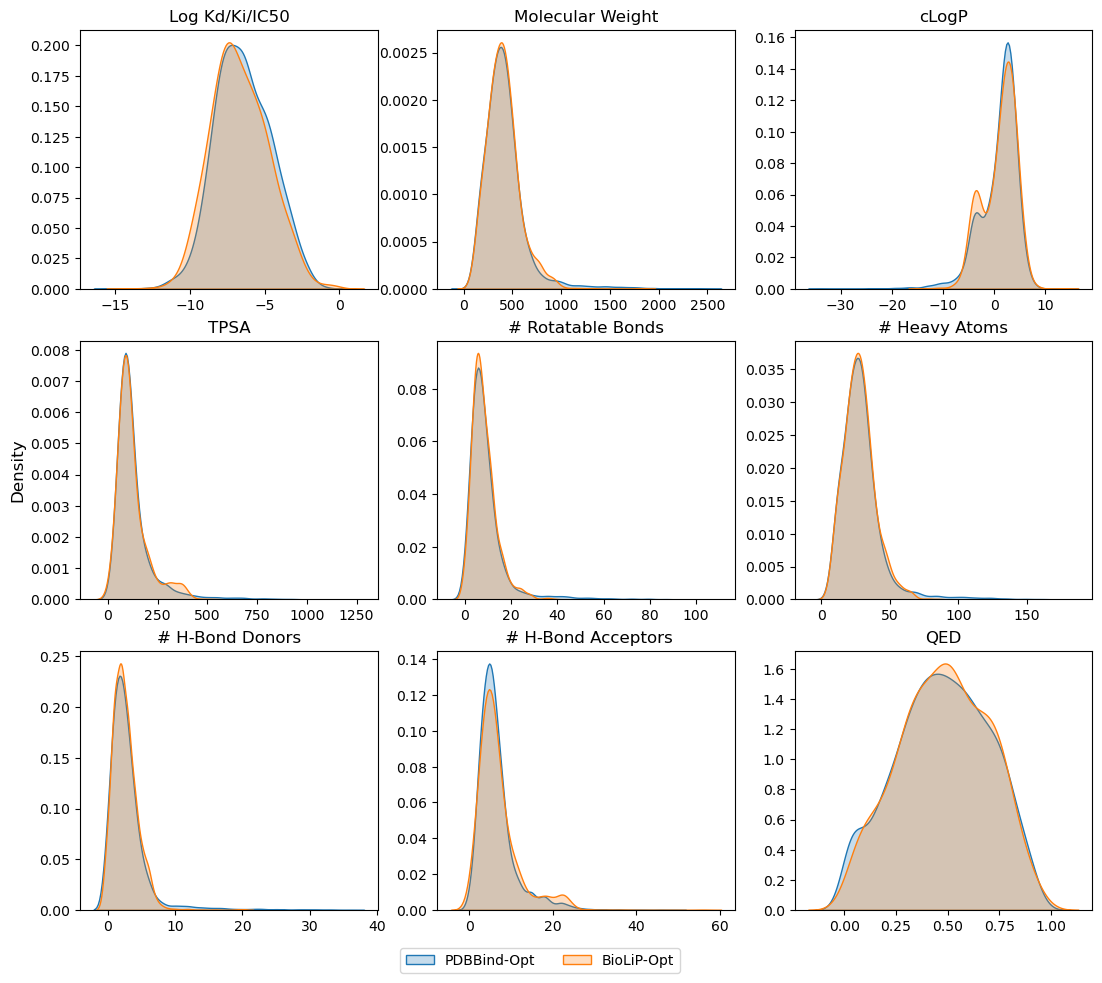

In [124]:
plt.rcParams['font.size'] = 10

props = [
    ('logvalue', 'Log Kd/Ki/IC50'),
    ('mol_weight', 'Molecular Weight'),
    ('logp', 'cLogP'),
    ('tpsa', 'TPSA'),
    ('num_rotatable_bonds', '# Rotatable Bonds'),
    ('num_heavy_atoms', '# Heavy Atoms'),
    ('num_h_donors', '# H-Bond Donors'),
    ('num_h_acceptors',' # H-Bond Acceptors'),
    ('qed', 'QED')
]

fig, axes = plt.subplots(3, 3, figsize=(11.5, 10), constrained_layout=False)

# Iterate through each property and plot it
for i, ax in enumerate(axes.flatten()):
    prop, xlabel = props[i]
    
    # Plot with custom labels for legend
    sns.kdeplot(pdbbind_df[prop], fill=True, ax=ax, bw_adjust=1.5, label="PDBBind-Opt" if i == 0 else "")
    sns.kdeplot(biolip_df[prop], fill=True, ax=ax, bw_adjust=1.5, label="BioLiP-Opt" if i == 0 else "")
    
    ax.set_title(xlabel, fontsize=12)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

# Set one common y-axis label
axes[1, 0].set_ylabel('Density', fontsize=12)

fig.subplots_adjust(left=0.1, right=0.98, top=0.95, bottom=0.07)
# Add a global legend
fig.legend(labels=["PDBBind-Opt", "BioLiP-Opt"], loc="lower center", fontsize=10, frameon=True, ncol=2, bbox_to_anchor=(0.5, 0.0))
fig.savefig('fig3_dis.pdf', pad_inches=0.05)


In [127]:
biolip_df.sort_values('mol_weight', ascending=False)

,PDBID,Year,Resolution,Ligand chain,Ligand CCD,Ligand residue sequence number,measurement,sign,value,unit,...,origin,mol_weight,logp,tpsa,num_rotatable_bonds,num_heavy_atoms,smiles,num_h_donors,num_h_acceptors,qed
4215,6o7y,2019,2.20,A,LRM,301,kd,=,110.000000,uM,...,Kd=110uM,1820.146,-8.42910,778.79,49,120,CO[C@@H]1[C@H](O)[C@@H](CO[P@](=O)([O-])O[C@H]...,7,56,0.014325
1055,3bf6,2007,2.500,H,SVR,301,ic50,=,40.000000,uM,...,ic50=40uM,1291.254,4.68764,500.73,18,86,Cc1ccc(C(=O)Nc2ccc(S(=O)(=O)[O-])c3cc(S(=O)(=O...,6,23,0.071454
2600,4w93,2014,1.352,A,3L9,503,ki,=,8.000000,nM,...,Ki=8nM,1229.062,-5.51780,533.18,37,86,C[C@@H]1O[C@@H](O[C@@H]2CO[C@@H](Oc3c(O)cc(-c4...,19,33,0.028262
4878,6vgf,2020,1.8300,A,WA3,301,kd,=,180.000000,uM,...,Kd=180uM,1217.289,-11.65060,530.63,40,79,OC[C@H]1O[C@@H](S[C@@H]2O[C@H](CSCc3cn(C[C@H]4...,20,37,0.058527
900,2vbq,2007,2.00,A,BSJ,1000,ki,<,41.000000,uM,...,Ki<41uM,1140.927,-10.61350,569.61,37,74,CC(C)(CO[P@](=O)([O-])O[P@](=O)([O-])OC[C@H]1O...,12,29,0.024949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4670,6tx5,2020,1.08,A,4MZ,203,kd,=,2.900000,nM,...,Kd=2.9nM,82.106,0.71812,28.68,1,6,Cc1c[nH]cn1,1,1,0.490447
648,2fnn,2006,1.8,A,4MZ,264,ki,=,200.000000,mM,...,Ki=200mM,82.106,0.71812,28.68,1,6,Cc1c[nH]cn1,1,1,0.490447
790,2ou0,2007,1.940,X,MR3,303,kd,=,592.000000,uM,...,Kd=592uM,81.118,1.02510,4.93,1,6,Cn1cccc1,0,1,0.439206
1122,3dmx,2008,1.80,A,BNZ,900,kd,=,58.500000,uM,...,Kd=58.5uM,78.114,1.68660,0.00,0,6,c1ccccc1,0,0,0.442628


In [126]:
valid = ['kd', 'ki']
biolip_df.query('sign == "=" & measurement in @valid & logvalue < -3 and logvalue > -15')

,PDBID,Year,Resolution,Ligand chain,Ligand CCD,Ligand residue sequence number,measurement,sign,value,unit,...,origin,mol_weight,logp,tpsa,num_rotatable_bonds,num_heavy_atoms,smiles,num_h_donors,num_h_acceptors,qed
0,182l,1995,1.80,A,BZF,401,kd,=,0.000112,M,...,Ka=8900M^-1,118.135,2.43280,13.14,0,9,c1ccc2occc2c1,0,1,0.517424
1,183l,1995,1.80,A,DEN,400,kd,=,0.000193,M,...,Ka=5170M^-1,116.163,2.25590,0.00,0,9,C1=Cc2ccccc2C1,0,0,0.487390
2,1a29,1998,2.74,A,TFP,153,kd,=,5000.000000,nM,...,Kd=5000nM,408.513,3.52850,10.92,5,28,C[NH+]1CCN(CCCN2c3ccccc3Sc3ccc(C(F)(F)F)cc32)CC1,1,3,0.830734
3,1a8g,1998,2.50,A,2Z4,100,ki,=,7.400000,nM,...,Ki=7.4nM,827.012,3.72810,201.16,26,60,COc1ccc(C[NH2+][C@@H](C(=O)N[C@H](C(=O)NCc2ccc...,7,9,0.069396
4,1a9r,1998,2.0,A,HPA,290,kd,=,680.000000,nM,...,Kd=680nM,136.114,-0.35380,74.43,0,10,O=c1[nH]cnc2nc[nH]c12,2,3,0.519237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5659,7ndo,2021,1.60,A,RAL,601,ki,=,0.370000,nM,...,"IC50=1.8nM,EC50=2.4nM,Ki=0.37nM",474.602,4.65810,71.20,9,34,O=C(c1ccc(OCC[NH+]2CCCCC2)cc1)c1c(-c2ccc(O)cc2...,3,5,0.340925
5661,7nel,2021,1.45,A,EST,601,kd,=,0.200000,nM,...,"IC50=1.3nM,Kd=0.2nM,EC50=0.75nM,Ki=0.21nM",272.388,3.60920,40.46,3,20,C[C@]12CC[C@@H]3c4ccc(O)cc4CC[C@H]3[C@@H]1CC[C...,2,2,0.757170
5663,7nfb,2021,1.33,A,GEN,601,ki,=,370.000000,nM,...,"IC50=395nM,EC50=240nM,Ki=370nM",270.240,2.57680,90.90,4,20,O=c1c(-c2ccc(O)cc2)coc2cc(O)cc(O)c12,3,5,0.631833
5666,7ng7,2021,1.5000,A,UCW,602,ki,=,0.800000,nM,...,"IC50=<0.500000nM,Ki=0.800000nM",512.659,0.62290,126.06,11,37,COc1cc(-c2nn(CC[N@H+]3CC[C@H]([NH+](C)C)CC3)c3...,4,8,0.365720
